<a href="https://colab.research.google.com/github/Christian-Bryan/Probabilidad-y-Estadistica/blob/main/Unidad1/Practica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probabilidad y Estadística**

##Grupo: 2Y
## **Unidad 1**
Docente: Jose Gabriel Rodriguez Rivas.

Alumno: Dominguez Lopez Christian Bryan.

**Practica 5 - Estadística descriptiva del `Dataset` 'Autos'**

Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencia central

In [ ]:
from statistics import *
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
#Cargar el archivo CSV en una variable llamada 'autos'
autos=pd.read_csv("autos2.csv", encoding="ISO-8859-1")

In [ ]:
#Mostramos los primeros 5 registros del archivo
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
#Determinar el valor minimo de los precios
autos.price.min()

5118.0

In [ ]:
#Determinar el valor maximo de los precios
autos.price.max()

45400.0

In [ ]:
#Determinar el valor de la moda de los precios
#Para convertir la serie de precios en una lista y entonces utilizar la funcion mode del modulo statistics uso .tolist
moda=mode(autos.price.tolist())
print(moda)

16500.0


In [ ]:
#Determinar el valor de la media de los precios
#Para excluir los datos no numericos en la lista plana de autos uso el metodo 'dropna' de pandas
mean(autos.price.dropna().tolist())

13207.129353233831

In [ ]:
#Determinar el valor de la media de los precios con mean de pandas directamente
media=autos.price.mean()
print(media)

13207.129353233831


In [ ]:
#Determinar el valor de la mediana de los precios
mediana=autos.price.median()
print(mediana)

10295.0


In [ ]:
#Determinar el valor de la desviación estándar de los precios
desv_est=stdev(autos.price.dropna().tolist())
print(desv_est)

7947.066341939274


In [ ]:
#Determinar los estadísticos y cuartiles con la función describe()
autos.price.describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


Realizar un histograma de precios de los automoviles

In [ ]:
#Determinar mediante la regla de sturges la cantidad optima de bins o separadores
n=len(autos.price)
K=int(1+math.log2(n))
print("Registros: ", n,"\nNumero de intervalos: ", K)

Registros:  205 
Numero de intervalos:  8


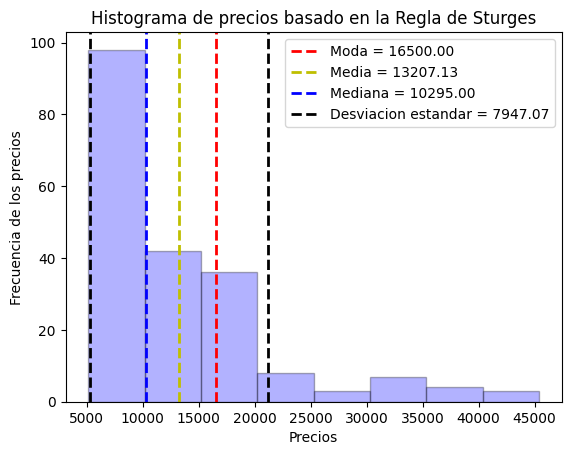

In [ ]:
#Poner títulos y encabezados apropiados
plt.hist(autos.price, bins=K, color='b', alpha=0.3, edgecolor='black')
plt.axvline(moda, color='r', linestyle='dashed', linewidth=2, label=f'Moda = {moda:.2f}')
plt.axvline(media, color='y', linestyle='dashed', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(mediana, color='b', linestyle='dashed', linewidth=2, label=f'Mediana = {mediana:.2f}')
plt.axvline(media-desv_est, color='black', linestyle='dashed', linewidth=2, label=f'Desviacion estandar = {desv_est:.2f}')
plt.axvline(media+desv_est, color='black', linestyle='dashed', linewidth=2)
plt.title("Histograma de precios basado en la Regla de Sturges")
plt.xlabel("Precios")
plt.ylabel("Frecuencia de los precios")
plt.legend()

plt.show()

In [ ]:
#Conclusiones de la grafica:
#Conforme el precio de los carros es mayor, la frecuencia con la que hay carros con ese precio disminuye.
#El promedio de precio de los carros es de aproximadamente 13207.13.
#Hay de hecho varios modas que se repiten el mismo numero de veces.

Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo de vehículo (body style)

<Axes: xlabel='price', ylabel='body-style'>

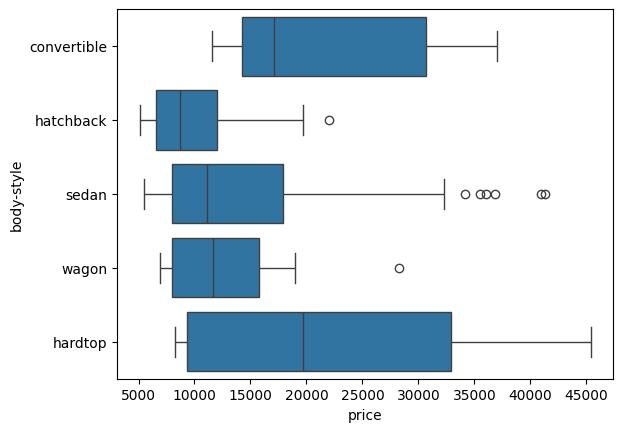

In [ ]:
#Poner títulos y encabezados apropiados
sns.boxplot(x="price", y="body-style", data=autos)

In [ ]:
#Conclusiones del diagrama:
#El estilo convertible tiene un promedio en los precios mas bajos de entre los que estan regisrados en su tipo.
#El estilo hatchback es el que tiene el menor promedio de precio de entre el resto de los estilos.
#El estilo Sedan tiene es el que tiene mas valores atipicos que sobrepasan al resto de sus registros.
#El estilo Wagon tiene registrado la mitad de sus precios entre aproximadamente $8000 y $16500, ocupando este rengo una gran parte de sus registros
#El estilo Hardtop cubre una amplia gama de precios que incluso sobrepasan los $40000. Tiene el promedio de precio mas alto.

Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo tracción ruedas (drive wheels)

<Axes: xlabel='price', ylabel='drive-wheels'>

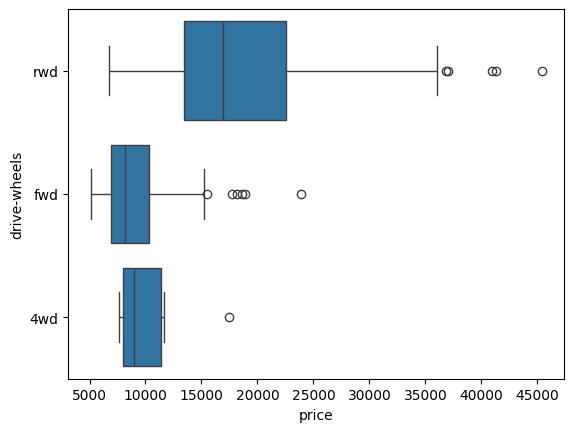

In [ ]:
#Poner títulos y encabezados apropiados
sns.boxplot(x="price", y="drive-wheels", data=autos)

In [ ]:
#Conclusiones del diagrama:
#Loa automoviles con traccion tipo rwd son los que tienen mayor cantidad de registros, aunque casi la mitad de los registros (la de los precios
#mas altos), sin tomar en cuenta algunas excepciones corresponde solo a una cuarta parte del total de registros que hay.
#Ocurre casi lo mismo con el tipo fwd que con el diagrama de los automoviles que tienen traccion tipo rwd solo que el numero de
#registros de este tipo no es siquiera de la mitad de los tipo rwd.
#Los automoviles con traccion tipo 4wd tienen la mitad de sus registros entre aproximadamente $7900 y $11900, el resto son valores un poco menores a
#ese precio y tambien un poco mayores a ese precio

Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y la ubicación del motor (engine-location)

<Axes: xlabel='price', ylabel='engine-location'>

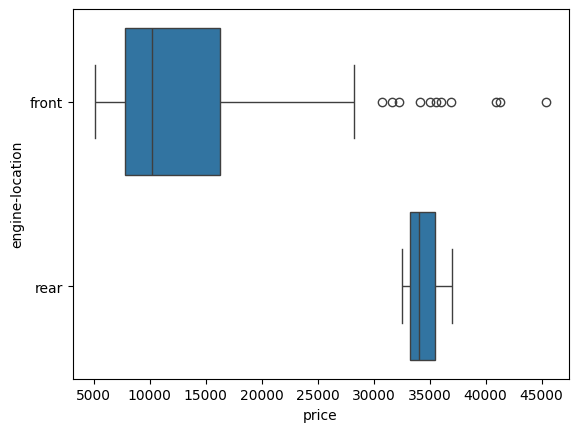

In [ ]:
#Poner títulos y encabezados apropiados
sns.boxplot(x="price", y="engine-location", data=autos)

In [ ]:
#Conclusiones del diagrama:
#En este grafico podemos observar que predominan los registros de precio de aquellos carros que tienen el motor en la parte delantera
#del vehiculo, lo cual es logico por que son los mas comunes.
#En cuanto a los que tienen el motor en la parte trasera, esta indicado que el numero de registros tiene un rango de precio mucho mas pequenio y
#que a la vez suele tener precios mucho mas altos.

Conclusiones generales de la practica:
El uso de phyton para hacer estadistica es bastante ventajoso ya que nos ahorra un monton de trabajo si tenemos que trabajar con un numero de datos muy grande, practicamente lo hace todo con solo unas pocas instrucciones siendo que como quien dice solo tienes que "modificar atributos" por decirlo de alguna manera.
